In [33]:
#%matplotlib widget #need this for click GUIs
import qubic.toolchain as tc
import qubic.rpc_client as rc
import qubitconfig.qchip as qc
from distproc.hwconfig import FPGAConfig, load_channel_configs
import numpy as np
import matplotlib.pyplot as plt
import chipcalibration.rabi_amp_sweep as rabi
from QubicPig import jobs, chipspec
from importlib import reload
import qubic.state_disc as sd
import chipcalibration.config as cfg
from qubic.job_manager import JobManager
from qubic.state_disc import GMMManager

In [34]:
fpga_config = FPGAConfig(**{'fpga_clk_period': 2.e-9, 'alu_instr_clks': 5, 'jump_cond_clks': 5, 'jump_fproc_clks': 5, 'pulse_regwrite_clks': 3})

qchipname = 'X4Y2'
fpga_config, qchip, channel_config = cfg.load_configs(qchipname)

In [35]:
reload(rc)
runner = rc.CircuitRunnerClient(ip='192.168.1.247')

In [36]:
register = ['Q3']

In [37]:
def sigma_separation(gmm):
    mean_i = gmm.means_[0]
    covar_i = gmm.covariances_[0]
    mean_j = gmm.means_[1]
    covar_j = gmm.covariances_[1]
    return np.sqrt((mean_i - mean_j)@np.linalg.inv((covar_i + covar_j)/2)@(mean_i-mean_j).T)

In [6]:
jm = JobManager(fpga_config, qchip, channel_config, runner)

TypeError: expected str, bytes or os.PathLike object, not dict

In [38]:

def readout_opt(target_qid, amp_interval, freq_interval, qchip):
    separations = np.zeros((len(amp_interval), len(freq_interval)))
    for idx_a, amp in enumerate(amp_interval):
        for idx_f, freq in enumerate(freq_interval):
            circ_instruction = [
                {'name': 'delay', 't': 400.e-6},
                {'name': 'X90', 'qubit': [target_qid]},
                {'name': 'read', 'qubit': [target_qid], 'modi':{(0, 'amp'): amp, (0, 'fcarrier'): 
                                                            freq, (1, 'fcarrier'): freq}},
            ]
            compiled_prog = tc.run_compile_stage(circ_instruction,fpga_config, qchip)
            asm_prog = tc.run_assemble_stage(compiled_prog, channel_config)
            s11 = runner.run_circuit_batch([asm_prog], 1000)
            gmm = GMMManager(chanmap_or_chan_cfgs=channel_config)
            gmm.fit(s11)
            # fitted_data = gmm.predict(s11)
            separations[idx_a, idx_f] = sigma_separation(gmm.gmm_dict[target_qid].gmmfit)
    return separations
            
            

In [39]:
qchip.qubits['Q3'].readfreq

6700437825.423339

In [46]:
amp_int = np.linspace(0.0005, 0.05, 10)
freq_int = np.linspace(6700437825.423339-3e6, 6700437825.423339+3e6, 30)

In [40]:
amp_int = np.linspace(0.0005, 0.05, 10)
freq_int = np.linspace(6700437825.423339-3e6, 6700437825.423339+3e6, 30)
seps = readout_opt('Q3', np.linspace(0.0005, 0.05, 10), np.linspace(6700437825.423339-3e6, 6700437825.423339+3e6, 30), qchip)

done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling
done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling
done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling
done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling
done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling
done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling
done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling
done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling
done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling
done resolving block
done z-resolving block
done resolving block

done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling
done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling
done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling
done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling
done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling
done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling
done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling
done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling
done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling
done resolving block
done z-resolving block
done resolving block

done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling
done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling
done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling
done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling
done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling
done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling
done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling
done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling
done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling
done resolving block
done z-resolving block
done resolving block

done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling
done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling
done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling
done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling
done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling
done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling
done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling
done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling
done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling
done resolving block
done z-resolving block
done resolving block

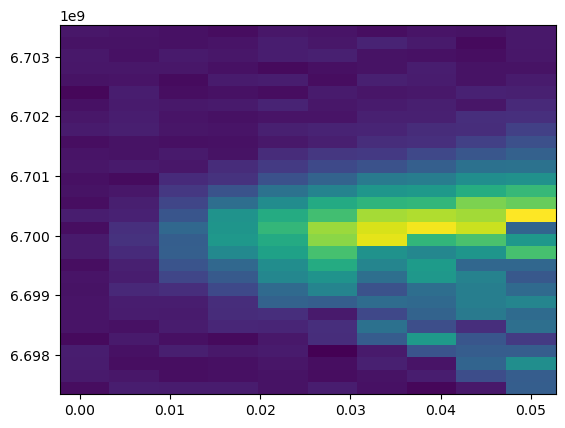

In [43]:
plt.pcolormesh(np.linspace(0.0005, 0.05, 10), np.linspace(6700437825.423339-3e6, 6700437825.423339+3e6, 30), seps.T)

In [44]:
np.max(seps)

8.86756690476104

In [50]:
np.unravel_index(np.argmax(seps), seps.shape)

(9, 14)

In [48]:
seps.shape

(10, 30)

In [49]:
np.ravel_multi_index?

In [51]:
amp_int[7]

0.03900000000000001

In [52]:
freq_int[13]

6700127480.595753